Этап 1. Подготовка данных:
1. Найти и загрузить набор данных для задачи классификации.
2. Провести необходимые шаги по предобработке данных:
• Проверить на наличие пропущенных значений и обработать их.
• Нормализовать или стандартизировать числовые признаки (если
это необходимо для алгоритмов).

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame
df.drop('Latitude', axis=1, inplace=True)
df.drop('Longitude', axis=1, inplace=True)
print(df.head())
print("Пропущенные значения:\n", df.isnull().sum())
df.dropna(inplace=True)

df=df.head(1000)

# Делим целевую переменную (цены на жилье) на классы (дешевое/дорогое жилье)
df['price_class'] = pd.qcut(df['MedHouseVal'], q=2, labels=[0, 1])

# Убираем старый целевой признак
df.drop('MedHouseVal', axis=1, inplace=True)
X = df.drop('price_class', axis=1)
y = df['price_class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  MedHouseVal
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556        4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842        3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260        3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945        3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467        3.422
Пропущенные значения:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
MedHouseVal    0
dtype: int64


<ipython-input-21-fdf194ab463d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_class'] = pd.qcut(df['MedHouseVal'], q=2, labels=[0, 1])
<ipython-input-21-fdf194ab463d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('MedHouseVal', axis=1, inplace=True)


Этап 2. Реализация моделей:
1. Используя функцию `train_test_split`, разделить набор данных на
обучающую и тестовую выборки.
2. Реализовать модели:
• Логистическая регрессия (`LogisticRegression`).
• Метод k-ближайших соседей (`KNeighborsClassifier`).
• Метод опорных векторов (SVM) (`SVC`).
3. Настроить гиперпараметры моделей с помощью `GridSearchCV`.

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

# 1. Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Коэффициент регуляризации
    'solver': ['liblinear', 'lbfgs']  # Разные решатели для задачи оптимизации
}

log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

print("Лучшие параметры для Логистической регрессии: ", log_reg_grid.best_params_)
print("Лучшая точность на кросс-валидации для Логистической регрессии: ", log_reg_grid.best_score_)

# 2. Метод k-ближайших соседей
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],  # Количество соседей
    'weights': ['uniform', 'distance']  # Вес для ближайших соседей
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("Лучшие параметры для k-ближайших соседей: ", knn_grid.best_params_)
print("Лучшая точность на кросс-валидации для k-ближайших соседей: ", knn_grid.best_score_)

# 3. Метод опорных векторов (SVM)
svm = SVC(probability=True)
svm_params = {
    'C': [0.01, 0.1, 1, 10],  # Коэффициент регуляризации
    'kernel': ['linear', 'rbf'],  # Разные ядра
    'gamma': ['scale', 'auto']  # Параметры для гауссового ядра
}

svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("Лучшие параметры для метода опорных векторов: ", svm_grid.best_params_)
print("Лучшая точность на кросс-валидации для метода опорных векторов: ", svm_grid.best_score_)

Размер обучающей выборки: (700, 6)
Размер тестовой выборки: (300, 6)
Лучшие параметры для Логистической регрессии:  {'C': 0.1, 'solver': 'liblinear'}
Лучшая точность на кросс-валидации для Логистической регрессии:  0.822857142857143
Лучшие параметры для k-ближайших соседей:  {'n_neighbors': 7, 'weights': 'distance'}
Лучшая точность на кросс-валидации для k-ближайших соседей:  0.8285714285714286
Лучшие параметры для метода опорных векторов:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Лучшая точность на кросс-валидации для метода опорных векторов:  0.8528571428571429


Этап 3. Оценка качества моделей:
1. Оценить модели на основе метрик accuracy, F1, confusion matrix.
2. Построить PR и ROC кривые для каждой модели.
3. Рассчитать PR-AUC и ROC-AUC для каждой модели.
4. Сравнить результаты моделей по всем метрикам.

Модель: Logistic Regression
Accuracy: 0.8267, F1: 0.8265, ROC AUC: 0.9137
Матрица ошибок:
 [[128  24]
 [ 28 120]]


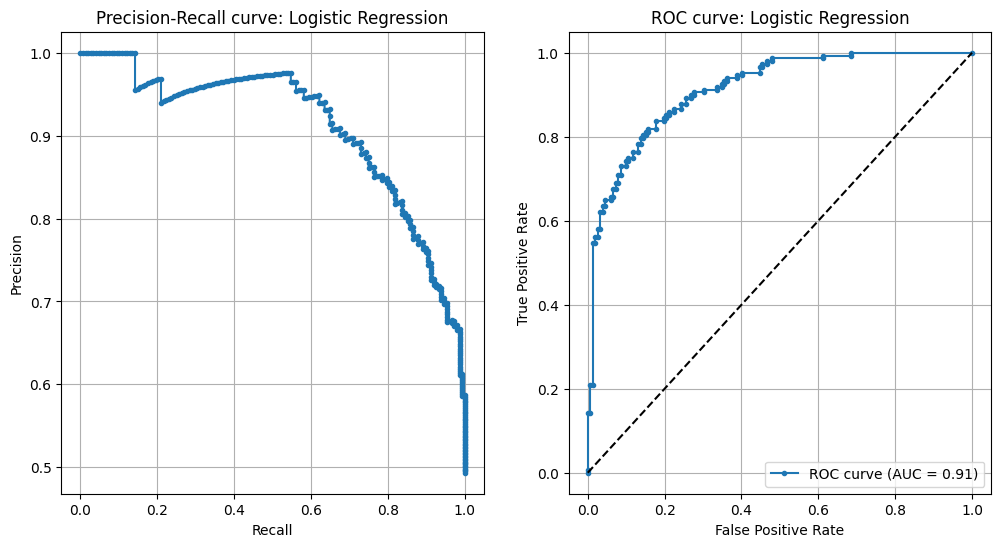

Модель: KNN
Accuracy: 0.8367, F1: 0.8360, ROC AUC: 0.9335
Матрица ошибок:
 [[135  17]
 [ 32 116]]


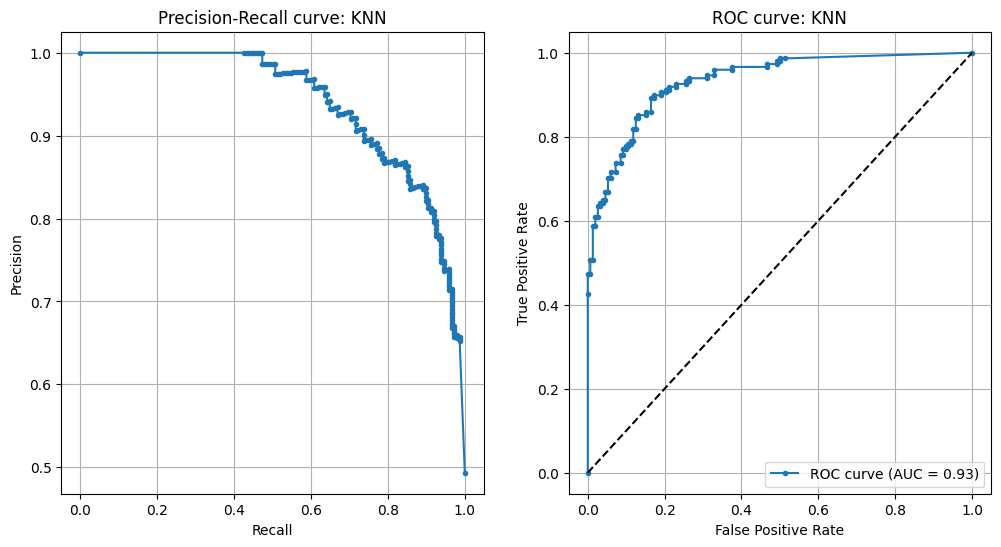

Модель: SVM
Accuracy: 0.8600, F1: 0.8599, ROC AUC: 0.9362
Матрица ошибок:
 [[133  19]
 [ 23 125]]


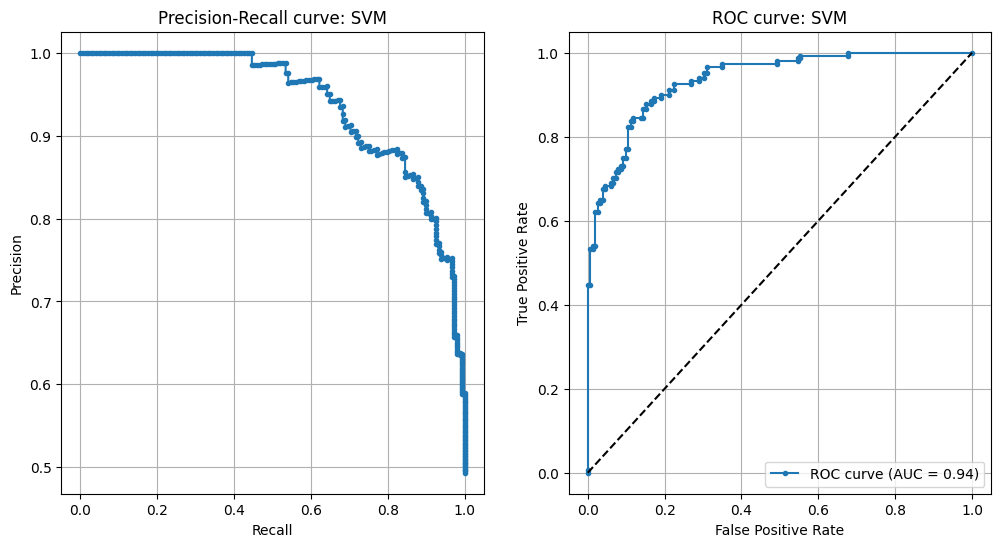

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt

# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # Получаем вероятности для всех классов

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])

    # ROC-кривая
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

    return accuracy, f1, conf_matrix, precision, recall, roc_auc, fpr, tpr

# Оценка моделей
models = {
    "Logistic Regression": log_reg_grid.best_estimator_,
    "KNN": knn_grid.best_estimator_,
    "SVM": svm_grid.best_estimator_
}

results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_test, y_test)

# Вывод метрик и построение кривых
for model_name, metrics in results.items():
    accuracy, f1, conf_matrix, precision, recall, roc_auc, fpr, tpr = metrics
    print(f"Модель: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
    print("Матрица ошибок:\n", conf_matrix)

    # Построение PR-кривой
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, marker='.', label='PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve: {model_name}')
    plt.grid()

    # Построение ROC-кривой
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, marker='.', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve: {model_name}')
    plt.plot([0, 1], [0, 1], 'k--')  # линия случайного угадывания
    plt.grid()

    plt.legend()
    plt.show()

    print("=" * 40)



Этап 4. Оптимизация порога (для бинарной классификации):
1. Построить PR-кривую и найти оптимальный порог по F1-метрике.
2. Построить ROC-кривую и найти оптимальный порог по G_mean.

Logistic Regression - Оптимальный порог по F1: 0.4618
Logistic Regression - Оптимальный порог по G-Mean: 0.4618


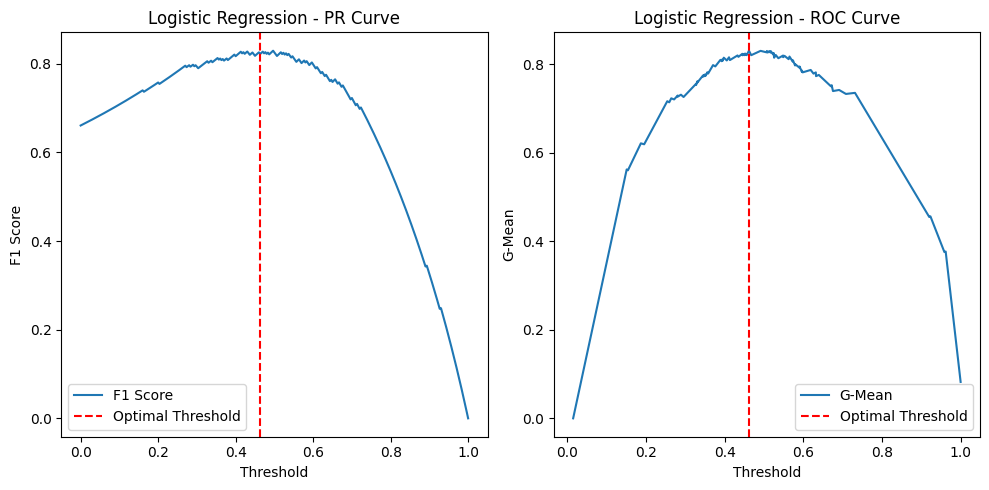

KNN - Оптимальный порог по F1: 0.3814
KNN - Оптимальный порог по G-Mean: 0.3867


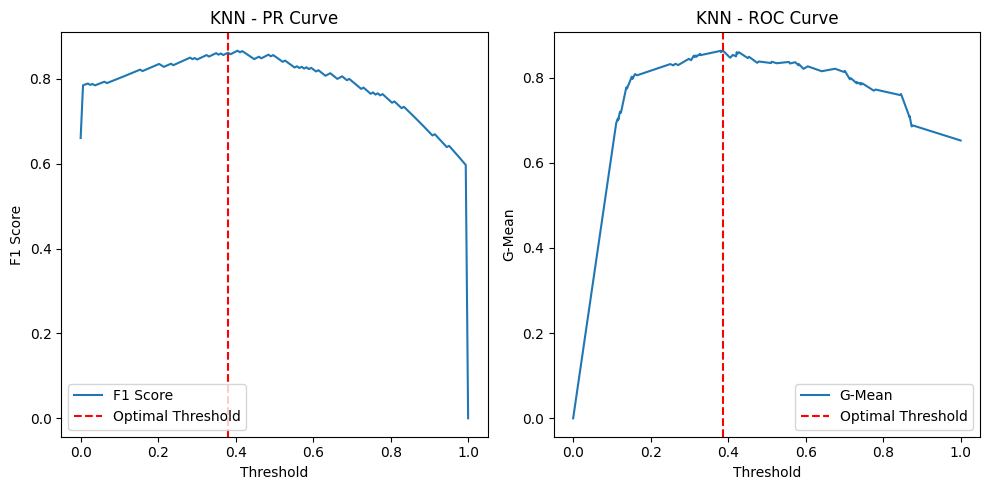

SVM - Оптимальный порог по F1: 0.4556
SVM - Оптимальный порог по G-Mean: 0.4556


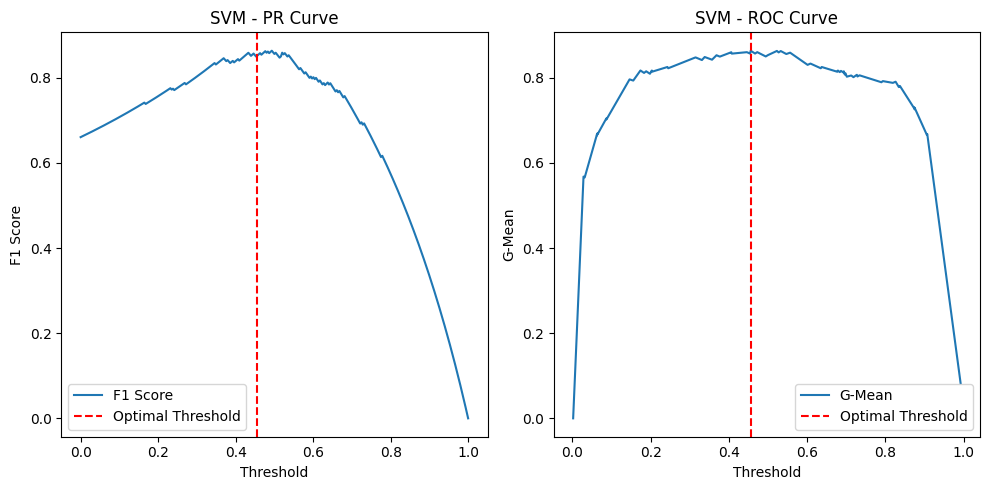

In [25]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Функция для нахождения оптимального порога по F1-метрике
def find_optimal_threshold_f1(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # Добавляем малое значение для избежания деления на ноль
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold, f1_scores, thresholds

# Функция для нахождения оптимального порога по G-Mean
def find_optimal_threshold_gmean(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    gmeans = np.sqrt(tpr * (1 - fpr))  # G-Mean
    optimal_threshold = thresholds[np.argmax(gmeans)]
    return optimal_threshold, gmeans, thresholds

# Оценка моделей и получение вероятностей
models = {
    "Logistic Regression": log_reg_grid.best_estimator_,
    "KNN": knn_grid.best_estimator_,
    "SVM": svm_grid.best_estimator_
}

for model_name, model in models.items():
    # Получение вероятностей для положительного класса
    y_scores = model.predict_proba(X_test)[:, 1]

    # Нахождение оптимального порога по F1-метрике
    optimal_threshold_f1, f1_scores, thresholds_f1 = find_optimal_threshold_f1(y_test, y_scores)
    print(f"{model_name} - Оптимальный порог по F1: {optimal_threshold_f1:.4f}")

    # Нахождение оптимального порога по G-Mean
    optimal_threshold_gmean, gmeans, thresholds_gmean = find_optimal_threshold_gmean(y_test, y_scores)
    print(f"{model_name} - Оптимальный порог по G-Mean: {optimal_threshold_gmean:.4f}")

    # Построение PR-кривой
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, 1, len(f1_scores)), f1_scores, label='F1 Score')
    plt.axvline(optimal_threshold_f1, linestyle='--', color='r', label='Optimal Threshold')
    plt.title(f'{model_name} - PR Curve')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.legend()

    # Построение ROC-кривой
    plt.subplot(1, 2, 2)
    plt.plot(thresholds_gmean, gmeans, label='G-Mean')
    plt.axvline(optimal_threshold_gmean, linestyle='--', color='r', label='Optimal Threshold')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('Threshold')
    plt.ylabel('G-Mean')
    plt.legend()

    plt.tight_layout()
    plt.show()
